In [157]:
import numpy as np
import pandas as pd
import xlrd
import os
import tarfile
from six.moves import urllib
import seaborn as sns


In [158]:
%matplotlib inline

In [159]:
pre = os.path.dirname(os.path.realpath('__file__'))
fname = 'DataFile2.xlsx'
path = os.path.join(pre, fname)
data = pd.read_excel(path)

In [160]:
data.head()

,Range,HITF/RHTL #,Shot #,Shot Date,Program,Series,Series Test #,Desired Velocity,Actual Velocity,Delta Velocity,...,Projectile Material,Projectile Mass,Barrel,Petal Valve,Accept / Unaccept,Reason If Unaccept,ES,Sabot Material,Sabot OD,Sabot Depth
0,1-Inch,14070,383,2014-05-20,ISS,NaN,NaN,7,7.02,0.02,...,al,NaN,5,10,Acceptable,NaN,4,NaN,1.0390,10.75
1,1-Inch,14069B,382,2014-05-14,ISS,NaN,NaN,7,7.11,0.11,...,al,NaN,5,10,Acceptable,NaN,4,NaN,1.0385,8.00
2,1-Inch,14068,380,2014-05-07,ISS,NaN,NaN,7,7.02,0.02,...,al,NaN,5,10,Acceptable,NaN,4,NaN,1.0360,9.50
3,1-Inch,14067B,379,2014-05-05,ISS,NaN,NaN,7,7.08,0.08,...,al,NaN,5,10,Acceptable,NaN,4,NaN,1.0350,8.00
4,1-Inch,14066,377,2014-04-21,ISS,NaN,NaN,7,7.12,0.12,...,al,NaN,1,10,Acceptable,NaN,4,NaN,1.0245,7.75


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 23 columns):
Range                  23 non-null object
HITF/RHTL #            22 non-null object
Shot #                 23 non-null int64
Shot Date              23 non-null datetime64[ns]
Program                22 non-null object
Series                 0 non-null float64
Series Test #          0 non-null float64
Desired Velocity       23 non-null int64
Actual Velocity        23 non-null float64
Delta Velocity         23 non-null float64
Powder                 23 non-null float64
Lp Mass                23 non-null float64
Projectile             23 non-null object
Projectile Material    23 non-null object
Projectile Mass        0 non-null float64
Barrel                 23 non-null int64
Petal Valve            23 non-null int64
Accept / Unaccept      23 non-null object
Reason If Unaccept     0 non-null float64
ES                     23 non-null int64
Sabot Material         0 non-null float64
Sabot OD

In [162]:
# data.drop('Count', axis=1, inplace=True)

In [163]:
data.describe()

,Shot #,Series,Series Test #,Desired Velocity,Actual Velocity,Delta Velocity,Powder,Lp Mass,Projectile Mass,Barrel,Petal Valve,Reason If Unaccept,ES,Sabot Material,Sabot OD,Sabot Depth
count,23.000000,0.0,0.0,23.0,23.000000,23.000000,23.000000,23.000000,0.0,23.000000,23.0,0.0,23.0,0.0,21.000000,21.000000
mean,362.956522,NaN,NaN,7.0,6.977826,-0.022174,1237.104348,12.394528,NaN,3.521739,10.0,NaN,4.0,NaN,2.178843,6.387143
std,14.258899,NaN,NaN,0.0,0.118089,0.118089,32.652391,0.911302,NaN,2.086092,0.0,NaN,0.0,NaN,5.313777,2.149703
min,338.000000,NaN,NaN,7.0,6.610000,-0.390000,1180.000000,11.007420,NaN,1.000000,10.0,NaN,4.0,NaN,1.000000,2.000000
25%,349.500000,NaN,NaN,7.0,6.915000,-0.085000,1211.200000,11.895335,NaN,1.000000,10.0,NaN,4.0,NaN,1.009000,5.250000
50%,367.000000,NaN,NaN,7.0,7.010000,0.010000,1232.100000,12.085480,NaN,5.000000,10.0,NaN,4.0,NaN,1.016500,6.000000
75%,374.500000,NaN,NaN,7.0,7.030000,0.030000,1272.200000,12.718450,NaN,5.000000,10.0,NaN,4.0,NaN,1.033800,8.000000
max,383.000000,NaN,NaN,7.0,7.190000,0.190000,1282.900000,15.750000,NaN,6.000000,10.0,NaN,4.0,NaN,25.370000,10.750000


In [164]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# data.hist(bins=50, figsize=(20,15))
# plt.show()

In [165]:
corr_matrix = data.corr()

corr_matrix["Actual Velocity"].sort_values(ascending=False)

Delta Velocity         1.000000
Actual Velocity        1.000000
Sabot Depth            0.489001
Shot #                 0.310112
Barrel                 0.152426
Powder                 0.059958
Lp Mass               -0.453493
Sabot OD              -0.679468
Series                      NaN
Series Test #               NaN
Desired Velocity            NaN
Projectile Mass             NaN
Petal Valve                 NaN
Reason If Unaccept          NaN
ES                          NaN
Sabot Material              NaN
Name: Actual Velocity, dtype: float64

In [166]:



s = data["Sabot Depth"].convert_objects(convert_numeric=True).dropna()
data['sabot_od'] = pd.to_numeric(data['Sabot OD'], errors='coerce')

#pd.to_numeric(data["Sabot Depth"])


C:\Users\drodri18\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [167]:
data["Sabot Depth"] = s
data.dropna(subset=["Sabot Depth"],inplace=True)
data.dropna(subset=["sabot_od"],inplace=True)
# special = df[df.kind=='special']
# others = df[df.kind!='special']

# special = special.dropna(how='any')



In [168]:
# data["Sabot_OD"] = data[(data['sabot_od']>0.4) & (data['sabot_od']<0.6)]['sabot_od']
data["Actual_Velocity"] = data[(data['Actual Velocity']>6.8) & (data['Actual Velocity']< 7.3)]['Actual Velocity']
data["Delta_Velocity"] = data[(data['Delta Velocity']> -0.17) & (data['Delta Velocity']< 0.17)]['Delta Velocity']
#data["Desired_Velocity"] = data[(data['Desired Velocity']> 6.79) & (data['Desired Velocity']< 7.1)]['Desired Velocity']
data["Desired_Velocity"] = data[data['Desired Velocity']== 7.0]['Desired Velocity']
data["Lp_Mass"] = data[data['Lp Mass']> 0.5]['Lp Mass']
# data["Barrel_"] = data[(data['Barrel']!= 4) & (data['Barrel']!= 8) & (data['Barrel']!= 9) & (data['Barrel']!= 10) & (data['Barrel']!= 13) & (data['Barrel']!= 14)]['Barrel']
# data.drop('Actual Velocity', axis=1,inplace=True)
data.drop('Delta Velocity', axis=1,inplace=True)
data.drop('Desired Velocity', axis=1,inplace=True)
data.drop('Lp Mass', axis=1,inplace=True)
data.drop('Sabot OD', axis=1,inplace=True)
data.drop('sabot_od', axis=1,inplace=True)
data.drop('Range', axis=1,inplace=True)
data.drop('Projectile', axis=1,inplace=True)
data.drop('Projectile Material', axis=1,inplace=True)
data.drop('Accept / Unaccept', axis=1,inplace=True)
data.drop('Reason If Unaccept ', axis=1,inplace=True)
data.drop('Shot Date', axis=1,inplace=True)
# data.drop('Barrel', axis=1,inplace=True)
data.drop('ES', axis=1,inplace=True)
data.drop('HITF/RHTL #', axis=1,inplace=True)
data.drop('Projectile Mass', axis=1,inplace=True)
data.drop('Shot #', axis=1,inplace=True)
data.drop('Program', axis=1,inplace=True)
data.drop('Series', axis=1,inplace=True)
data.drop('Series Test #', axis=1,inplace=True)
data.drop('Petal Valve', axis=1,inplace=True)
data.drop('Sabot Material', axis=1,inplace=True)
data.drop('Barrel', axis=1,inplace=True)
# data.dropna(subset=["Muzzle"],inplace=True)
# data.dropna(subset=["Sabot_OD"],inplace=True)
data.dropna(subset=["Actual_Velocity"],inplace=True)
data.dropna(subset=["Delta_Velocity"],inplace=True)
data.dropna(subset=["Desired_Velocity"],inplace=True)
data.dropna(subset=["Lp_Mass"],inplace=True)
# data.dropna(subset=["Barrel_"],inplace=True)
# data["Squeeze"] = data["Sabot_OD"] - data["Muzzle"]
data




,Actual Velocity,Powder,Sabot Depth,Actual_Velocity,Delta_Velocity,Desired_Velocity,Lp_Mass
0,7.02,1232.1,10.75,7.02,0.02,7,12.93234
1,7.11,1208.0,8.00,7.11,0.11,7,11.98934
2,7.02,1211.2,9.50,7.02,0.02,7,12.01177
3,7.08,1225.0,8.00,7.08,0.08,7,11.99507
4,7.12,1282.9,7.75,7.12,0.12,7,11.90089
5,7.01,1282.1,4.25,7.01,0.01,7,12.49797
6,7.01,1280.0,10.00,7.01,0.01,7,11.00742
7,6.93,1272.2,6.00,6.93,-0.07,7,11.88978
8,6.93,1275.1,4.25,6.93,-0.07,7,12.08548
9,6.90,1272.2,4.50,6.90,-0.10,7,11.61534


In [169]:
#data.dropna(subset=["Powder-(SabotOD-Muzzle*Insertion Depth)"],inplace=True)

#sabot_od = data[(data['Sabot OD']> 0.4) & (data['Sabot OD']<0.6)]

# sabot_od1 = data[data['Sabot_od']> 0.4]
# sabot_od1
# data['Sabot OD_'] = sabot_od1
#data[['Powder','Powder-(SabotOD-Muzzle*Insertion Depth)']]

In [170]:
corr_matrix = data.corr()

corr_matrix["Actual_Velocity"].sort_values(ascending=False)

Delta_Velocity      1.000000
Actual_Velocity     1.000000
Actual Velocity     1.000000
Sabot Depth         0.412994
Powder              0.040464
Lp_Mass             0.000234
Desired_Velocity         NaN
Name: Actual_Velocity, dtype: float64

In [171]:
corr_matrix = data.corr()

corr_matrix["Powder"].sort_values(ascending=False)

Powder              1.000000
Delta_Velocity      0.040464
Actual_Velocity     0.040464
Actual Velocity     0.040464
Sabot Depth        -0.076150
Lp_Mass            -0.495159
Desired_Velocity         NaN
Name: Powder, dtype: float64

C:\Users\drodri18\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1E8CEB860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C1EA741BA8>]], dtype=object)

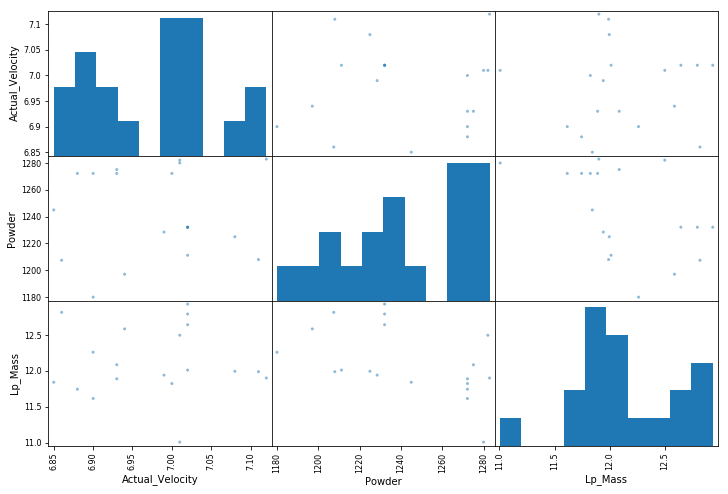

In [172]:
from pandas.tools.plotting import scatter_matrix

attributes = ["Actual_Velocity","Powder","Lp_Mass"]

scatter_matrix(data[attributes], figsize=(12,8))

In [173]:
# sns.lmplot(x='Lp_Mass', y='Powder',data=data, col='Barrel_', size=3)

In [174]:
writer = pd.ExcelWriter('CleanData2.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
data.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()


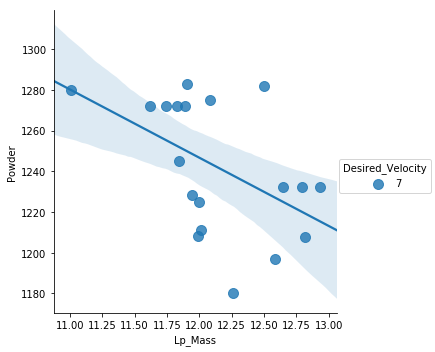

In [175]:
sns.lmplot(x='Lp_Mass', y='Powder', data=data,hue='Desired_Velocity',scatter_kws={'s':100})